In [1]:
!pip install ultralytics -q

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.0/883.0 kB 37.4 MB/s eta 0:00:00


In [2]:
!pip install roboflow -q

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 80.4/80.4 kB 5.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 66.8/66.8 kB 5.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 54.5/54.5 kB 5.0 MB/s eta 0:00:00


In [3]:
from roboflow import Roboflow
rf = Roboflow(api_key="")
project = rf.workspace("").project("sc_280_v2")
version = project.version(1)
dataset = version.download("yolov8")


loading Roboflow workspace...
loading Roboflow project...
Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.
Dependency ultralytics==8.0.196 is required but found version=8.3.7, to fix: `pip install ultralytics==8.0.196`



Extracting Dataset Version Zip to sc_280_v2-1 in yolov8:: 100%|██████████| 540/540 [00:00<00:00, 7902.16it/s]


In [7]:
%cat /content/sc_280_v2-1/data.yaml

names:
- Bdot
- bulge-circuit
- circle
- curve
- curve-circuit
- cut-circuit
- dot
- edge-circuit
- fat-circuit
- scratch
- short-circuit
- spot
- straight
- thin-circuit
nc: 14
roboflow:
  license: CC BY 4.0
  project: sc_280_v2
  url: https://universe.roboflow.com/kdthang/sc_280_v2/dataset/1
  version: 1
  workspace: kdthang
test: ../test/images
train: sc_280_v2-1/train/images
val: sc_280_v2-1/valid/images


In [5]:
!pip install PyYAML -q

In [10]:
import yaml

data = { 'train' : '/content/sc_280_v2-1/train/images',
         'val' : '/content/sc_280_v2-1/valid/images',
         'test' : '/content/sc_280_v2-1/test/images',
         'names' : ['Bdot', 'curve', 'dot', 'straight', 'bulge-circuit', 'circle', 'curve-circuit', 'cut-circuit',
         'edge-circuit', 'fat-circuit', 'short-circuit', 'scratch', 'short-circuit', 'spot', 'thin-circuit'],
         'nc' : 15}

with open('/content/sc_280_v2-1/data.yaml', 'w') as f:
  yaml.dump(data, f)

with open('/content/sc_280_v2-1/data.yaml', 'r') as f:
  data_yaml = yaml.safe_load(f)
  display(data_yaml)

{'names': ['Bdot',
  'curve',
  'dot',
  'straight',
  'bulge-circuit',
  'circle',
  'curve-circuit',
  'cut-circuit',
  'edge-circuit',
  'fat-circuit',
  'short-circuit',
  'scratch',
  'short-circuit',
  'spot',
  'thin-circuit'],
 'nc': 15,
 'test': '/content/sc_280_v2-1/test/images',
 'train': '/content/sc_280_v2-1/train/images',
 'val': '/content/sc_280_v2-1/valid/images'}

In [11]:
%cat /content/sc_280_v2-1/data.yaml

names:
- Bdot
- curve
- dot
- straight
- bulge-circuit
- circle
- curve-circuit
- cut-circuit
- edge-circuit
- fat-circuit
- short-circuit
- scratch
- short-circuit
- spot
- thin-circuit
nc: 15
test: /content/sc_280_v2-1/test/images
train: /content/sc_280_v2-1/train/images
val: /content/sc_280_v2-1/valid/images


In [12]:
from ultralytics import YOLO

model = YOLO('yolov8n.pt')

100%|██████████| 6.25M/6.25M [00:00<00:00, 291MB/s]


In [18]:
model.train(data='/content/sc_280_v2-1/data.yaml', epochs=200, patience=20, batch=32, imgsz=640)

Ultralytics 8.3.7 🚀 Python-3.10.12 torch-2.4.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
engine/trainer: task=detect, mode=train, model=yolov8n.pt, data=/content/sc_280_v2-1/data.yaml, epochs=200, time=None, patience=20, batch=32, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train2, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf=True, show_b

train: Scanning /content/sc_280_v2-1/train/labels.cache... 181 images, 1 backgrounds, 0 corrupt: 100%|██████████| 181/181 [00:00<?, ?it/s]

albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1, 4.0), tile_grid_size=(8, 8))



val: Scanning /content/sc_280_v2-1/valid/labels.cache... 56 images, 0 backgrounds, 0 corrupt: 100%|██████████| 56/56 [00:00<?, ?it/s]


Plotting labels to runs/detect/train2/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.000526, momentum=0.9) with parameter groups 63 weight(decay=0.0), 70 weight(decay=0.0005), 69 bias(decay=0.0)
TensorBoard: model graph visualization added ✅
Image sizes 640 train, 640 val
Using 2 dataloader workers
Logging results to runs/detect/train2
Starting training for 200 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      1/200      4.86G      1.784      2.808       1.01         88        640: 100%|██████████| 6/6 [00:04<00:00,  1.36it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:01<00:00,  1.08s/it]

                   all         56        216      0.305       0.47      0.353      0.158



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      2/200      4.36G      1.684      2.611      1.005         71        640: 100%|██████████| 6/6 [00:03<00:00,  1.71it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:01<00:00,  1.10s/it]

                   all         56        216      0.352      0.417      0.346      0.157



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      3/200      4.27G      1.673      2.591      1.003         76        640: 100%|██████████| 6/6 [00:02<00:00,  2.79it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.61it/s]

                   all         56        216      0.353      0.448      0.352      0.161



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      4/200      4.35G       1.68      2.398       1.04         72        640: 100%|██████████| 6/6 [00:02<00:00,  2.74it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.77it/s]

                   all         56        216      0.356      0.391      0.294      0.114



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      5/200      4.28G      1.781       2.29      1.017         90        640: 100%|██████████| 6/6 [00:02<00:00,  2.76it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.04it/s]

                   all         56        216      0.521      0.311      0.243        0.1



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      6/200      4.32G      1.718      2.611      1.027         97        640: 100%|██████████| 6/6 [00:02<00:00,  2.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:01<00:00,  1.10s/it]

                   all         56        216      0.385      0.397      0.263      0.117



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      7/200      4.34G      1.851      2.517      1.052         93        640: 100%|██████████| 6/6 [00:02<00:00,  2.70it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.66it/s]

                   all         56        216      0.335      0.379      0.274      0.112



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      8/200      4.34G      1.861      2.518       1.05         86        640: 100%|██████████| 6/6 [00:02<00:00,  2.81it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.33it/s]

                   all         56        216      0.564      0.223      0.226      0.101



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      9/200      4.27G      1.917      2.532       1.11        109        640: 100%|██████████| 6/6 [00:02<00:00,  2.74it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:01<00:00,  1.16s/it]

                   all         56        216      0.607       0.17      0.248      0.112



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     10/200      4.33G      1.863      2.285      1.062         72        640: 100%|██████████| 6/6 [00:02<00:00,  2.29it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:01<00:00,  1.06s/it]

                   all         56        216      0.294      0.418      0.294      0.145



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     11/200       4.3G      1.813      2.758      1.036         87        640: 100%|██████████| 6/6 [00:02<00:00,  2.87it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.48it/s]

                   all         56        216      0.297      0.345      0.279      0.159



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     12/200      4.28G      1.894      2.486      1.057         76        640: 100%|██████████| 6/6 [00:02<00:00,  2.94it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.47it/s]

                   all         56        216      0.284      0.374      0.277      0.146



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     13/200      4.31G       1.88      2.488      1.041         56        640: 100%|██████████| 6/6 [00:01<00:00,  3.01it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.24it/s]

                   all         56        216      0.339       0.34       0.34      0.181



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     14/200      4.35G      1.799      2.431      1.066         72        640: 100%|██████████| 6/6 [00:02<00:00,  2.29it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:01<00:00,  1.03s/it]

                   all         56        216      0.382      0.322      0.333      0.173



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     15/200      4.27G      1.905      2.494       1.06         81        640: 100%|██████████| 6/6 [00:02<00:00,  2.95it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.59it/s]

                   all         56        216      0.399      0.468      0.399      0.185



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     16/200      4.36G      1.841       2.35      1.038        108        640: 100%|██████████| 6/6 [00:02<00:00,  2.91it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.68it/s]

                   all         56        216      0.197      0.443      0.328      0.169



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     17/200       4.3G       1.81       2.49       1.04         68        640: 100%|██████████| 6/6 [00:02<00:00,  2.64it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.68it/s]

                   all         56        216      0.284      0.345      0.256      0.135



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     18/200      4.35G      1.816      2.705      1.051         62        640: 100%|██████████| 6/6 [00:02<00:00,  2.42it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:01<00:00,  1.02s/it]

                   all         56        216      0.292      0.305       0.29      0.111



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     19/200      4.32G      1.918      2.401      1.066         81        640: 100%|██████████| 6/6 [00:02<00:00,  2.37it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.36it/s]

                   all         56        216      0.425      0.308      0.296      0.111



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     20/200       4.3G      1.895      2.518      1.079         86        640: 100%|██████████| 6/6 [00:02<00:00,  2.88it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.51it/s]

                   all         56        216      0.599      0.195      0.303      0.093



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     21/200       4.3G      1.895      2.454      1.053         69        640: 100%|██████████| 6/6 [00:02<00:00,  2.90it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.73it/s]

                   all         56        216       0.56      0.278      0.303     0.0816



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     22/200      4.32G      1.908      2.283      1.092        122        640: 100%|██████████| 6/6 [00:02<00:00,  2.53it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:01<00:00,  1.02s/it]

                   all         56        216      0.574      0.315      0.295     0.0864



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     23/200      4.29G      1.882      2.369      1.047         83        640: 100%|██████████| 6/6 [00:02<00:00,  2.32it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:01<00:00,  1.12s/it]

                   all         56        216       0.51      0.208        0.3      0.103



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     24/200      4.26G      1.875       2.24      1.068         83        640: 100%|██████████| 6/6 [00:02<00:00,  2.93it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.60it/s]

                   all         56        216      0.403      0.434      0.343       0.14



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     25/200      4.32G      1.895      2.325      1.078         93        640: 100%|██████████| 6/6 [00:02<00:00,  2.96it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.61it/s]

                   all         56        216      0.406      0.387      0.322      0.128



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     26/200      4.27G      1.854       2.24      1.071         68        640: 100%|██████████| 6/6 [00:02<00:00,  2.64it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.04it/s]

                   all         56        216      0.185      0.468      0.293      0.133



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     27/200      4.28G      1.851      2.223      1.055        101        640: 100%|██████████| 6/6 [00:02<00:00,  2.33it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:01<00:00,  1.16s/it]

                   all         56        216       0.36      0.332      0.267      0.112



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     28/200      4.27G      1.914      2.621      1.023         89        640: 100%|██████████| 6/6 [00:02<00:00,  2.97it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.55it/s]

                   all         56        216      0.235      0.501      0.246      0.105



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     29/200      4.37G      1.867      2.132      1.026         65        640: 100%|██████████| 6/6 [00:02<00:00,  2.93it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.53it/s]

                   all         56        216      0.399      0.403      0.309      0.123



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     30/200      4.28G      1.917      2.227       1.06         59        640: 100%|██████████| 6/6 [00:02<00:00,  2.76it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.25it/s]

                   all         56        216      0.362      0.389      0.264      0.139



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     31/200      4.27G      1.889      2.268      1.078         83        640: 100%|██████████| 6/6 [00:02<00:00,  2.42it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:01<00:00,  1.14s/it]

                   all         56        216      0.304      0.425      0.298      0.141



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     32/200      4.32G      1.749      2.234     0.9952         55        640: 100%|██████████| 6/6 [00:02<00:00,  2.36it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.43it/s]

                   all         56        216      0.325      0.435      0.303      0.146



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     33/200      4.31G      1.799      2.191      1.056         77        640: 100%|██████████| 6/6 [00:02<00:00,  2.85it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.45it/s]

                   all         56        216      0.309      0.387      0.292      0.139



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     34/200      4.35G      1.693      2.132       1.06         79        640: 100%|██████████| 6/6 [00:02<00:00,  2.91it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.45it/s]

                   all         56        216      0.445       0.34       0.25      0.111



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     35/200      4.28G      1.735      2.129      1.043         74        640: 100%|██████████| 6/6 [00:02<00:00,  2.53it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:01<00:00,  1.17s/it]

                   all         56        216      0.488      0.243      0.235      0.104
EarlyStopping: Training stopped early as no improvement observed in last 20 epochs. Best results observed at epoch 15, best model saved as best.pt.
To update EarlyStopping(patience=20) pass a new patience value, i.e. `patience=300` or use `patience=0` to disable EarlyStopping.



35 epochs completed in 0.048 hours.
Optimizer stripped from runs/detect/train2/weights/last.pt, 5.6MB
Optimizer stripped from runs/detect/train2/weights/best.pt, 5.6MB

Validating runs/detect/train2/weights/best.pt...
Ultralytics 8.3.7 🚀 Python-3.10.12 torch-2.4.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 186 layers, 2,687,293 parameters, 0 gradients, 6.8 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.53it/s]


                   all         56        216      0.399      0.467      0.401       0.18
                  Bdot          6          7      0.343      0.857      0.665      0.433
                   dot          1          3      0.172      0.902      0.187      0.062
              straight          2          3      0.303      0.878      0.665      0.223
         bulge-circuit          3          9     0.0842      0.222      0.168     0.0487
         curve-circuit         53        178      0.329      0.107     0.0998     0.0375
           cut-circuit          1          2       0.45          1      0.497      0.274
           fat-circuit          1          1          1          0          0          0
         short-circuit          1          3     0.0412     0.0962      0.168     0.0557
               scratch          2          2      0.312        0.5      0.537       0.12
         short-circuit          1          7       0.36      0.571      0.425      0.129
                  spo

ultralytics.utils.metrics.DetMetrics object with attributes:

ap_class_index: array([ 0,  2,  3,  4,  6,  7,  9, 10, 11, 12, 13])
box: ultralytics.utils.metrics.Metric object
confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x7b1e028c48e0>
curves: ['Precision-Recall(B)', 'F1-Confidence(B)', 'Precision-Confidence(B)', 'Recall-Confidence(B)']
curves_results: [[array([          0,    0.001001,    0.002002,    0.003003,    0.004004,    0.005005,    0.006006,    0.007007,    0.008008,    0.009009,     0.01001,    0.011011,    0.012012,    0.013013,    0.014014,    0.015015,    0.016016,    0.017017,    0.018018,    0.019019,     0.02002,    0.021021,    0.022022,    0.023023,
          0.024024,    0.025025,    0.026026,    0.027027,    0.028028,    0.029029,     0.03003,    0.031031,    0.032032,    0.033033,    0.034034,    0.035035,    0.036036,    0.037037,    0.038038,    0.039039,     0.04004,    0.041041,    0.042042,    0.043043,    0.044044,    0.045045,    0.

- Fitness는 모델의 전체적인 성능을 나타내는 종합 지표입니다. YOLOv8에서 다양한 평가 지표(precision, recall, mAP 등)를 기반으로 모델의 적합성을 계산한 값입니다. 이 값은 0에서 1 사이의 값이며, 값이 클수록 모델의 성능이 좋다고 볼 수 있습니다.
- keys: ['metrics/precision(B)', 'metrics/recall(B)', 'metrics/mAP50(B)', 'metrics/mAP50-95(B)']
이 항목은 YOLOv8에서 학습 후 평가에 사용된 주요 지표들의 목록을 보여줍니다.
  - Precision (정밀도): 모델이 탐지한 객체 중에서 올바르게 탐지된 객체의 비율입니다.
  - Recall (재현율): 실제로 존재하는 객체 중에서 모델이 올바르게 탐지한 비율입니다.
  - mAP50 (Mean Average Precision at IoU=0.50): Intersection over Union (IoU) 값이 0.5일 때의 평균 정밀도입니다.
  - mAP50-95 (Mean Average Precision at IoU=0.50 to 0.95): IoU 값이 0.5부터 0.95까지의 평균 정밀도입니다. 더 세밀한 평가를 반영하는 지표입니다.
- maps: array([...])
  - Mean Average Precision (mAP) 값들의 배열을 나타냅니다. 각 클래스에 대해 mAP50-95 점수를 보여줍니다.
- names: 이 항목은 클래스 ID와 클래스 이름을 매핑한 딕셔너리입니다.
- results_dict: {...}
  - Precision, Recall, mAP50, mAP50-95, fitness 등의 평가 지표를 다시 한 번 딕셔너리 형태로 요약해서 보여줍니다

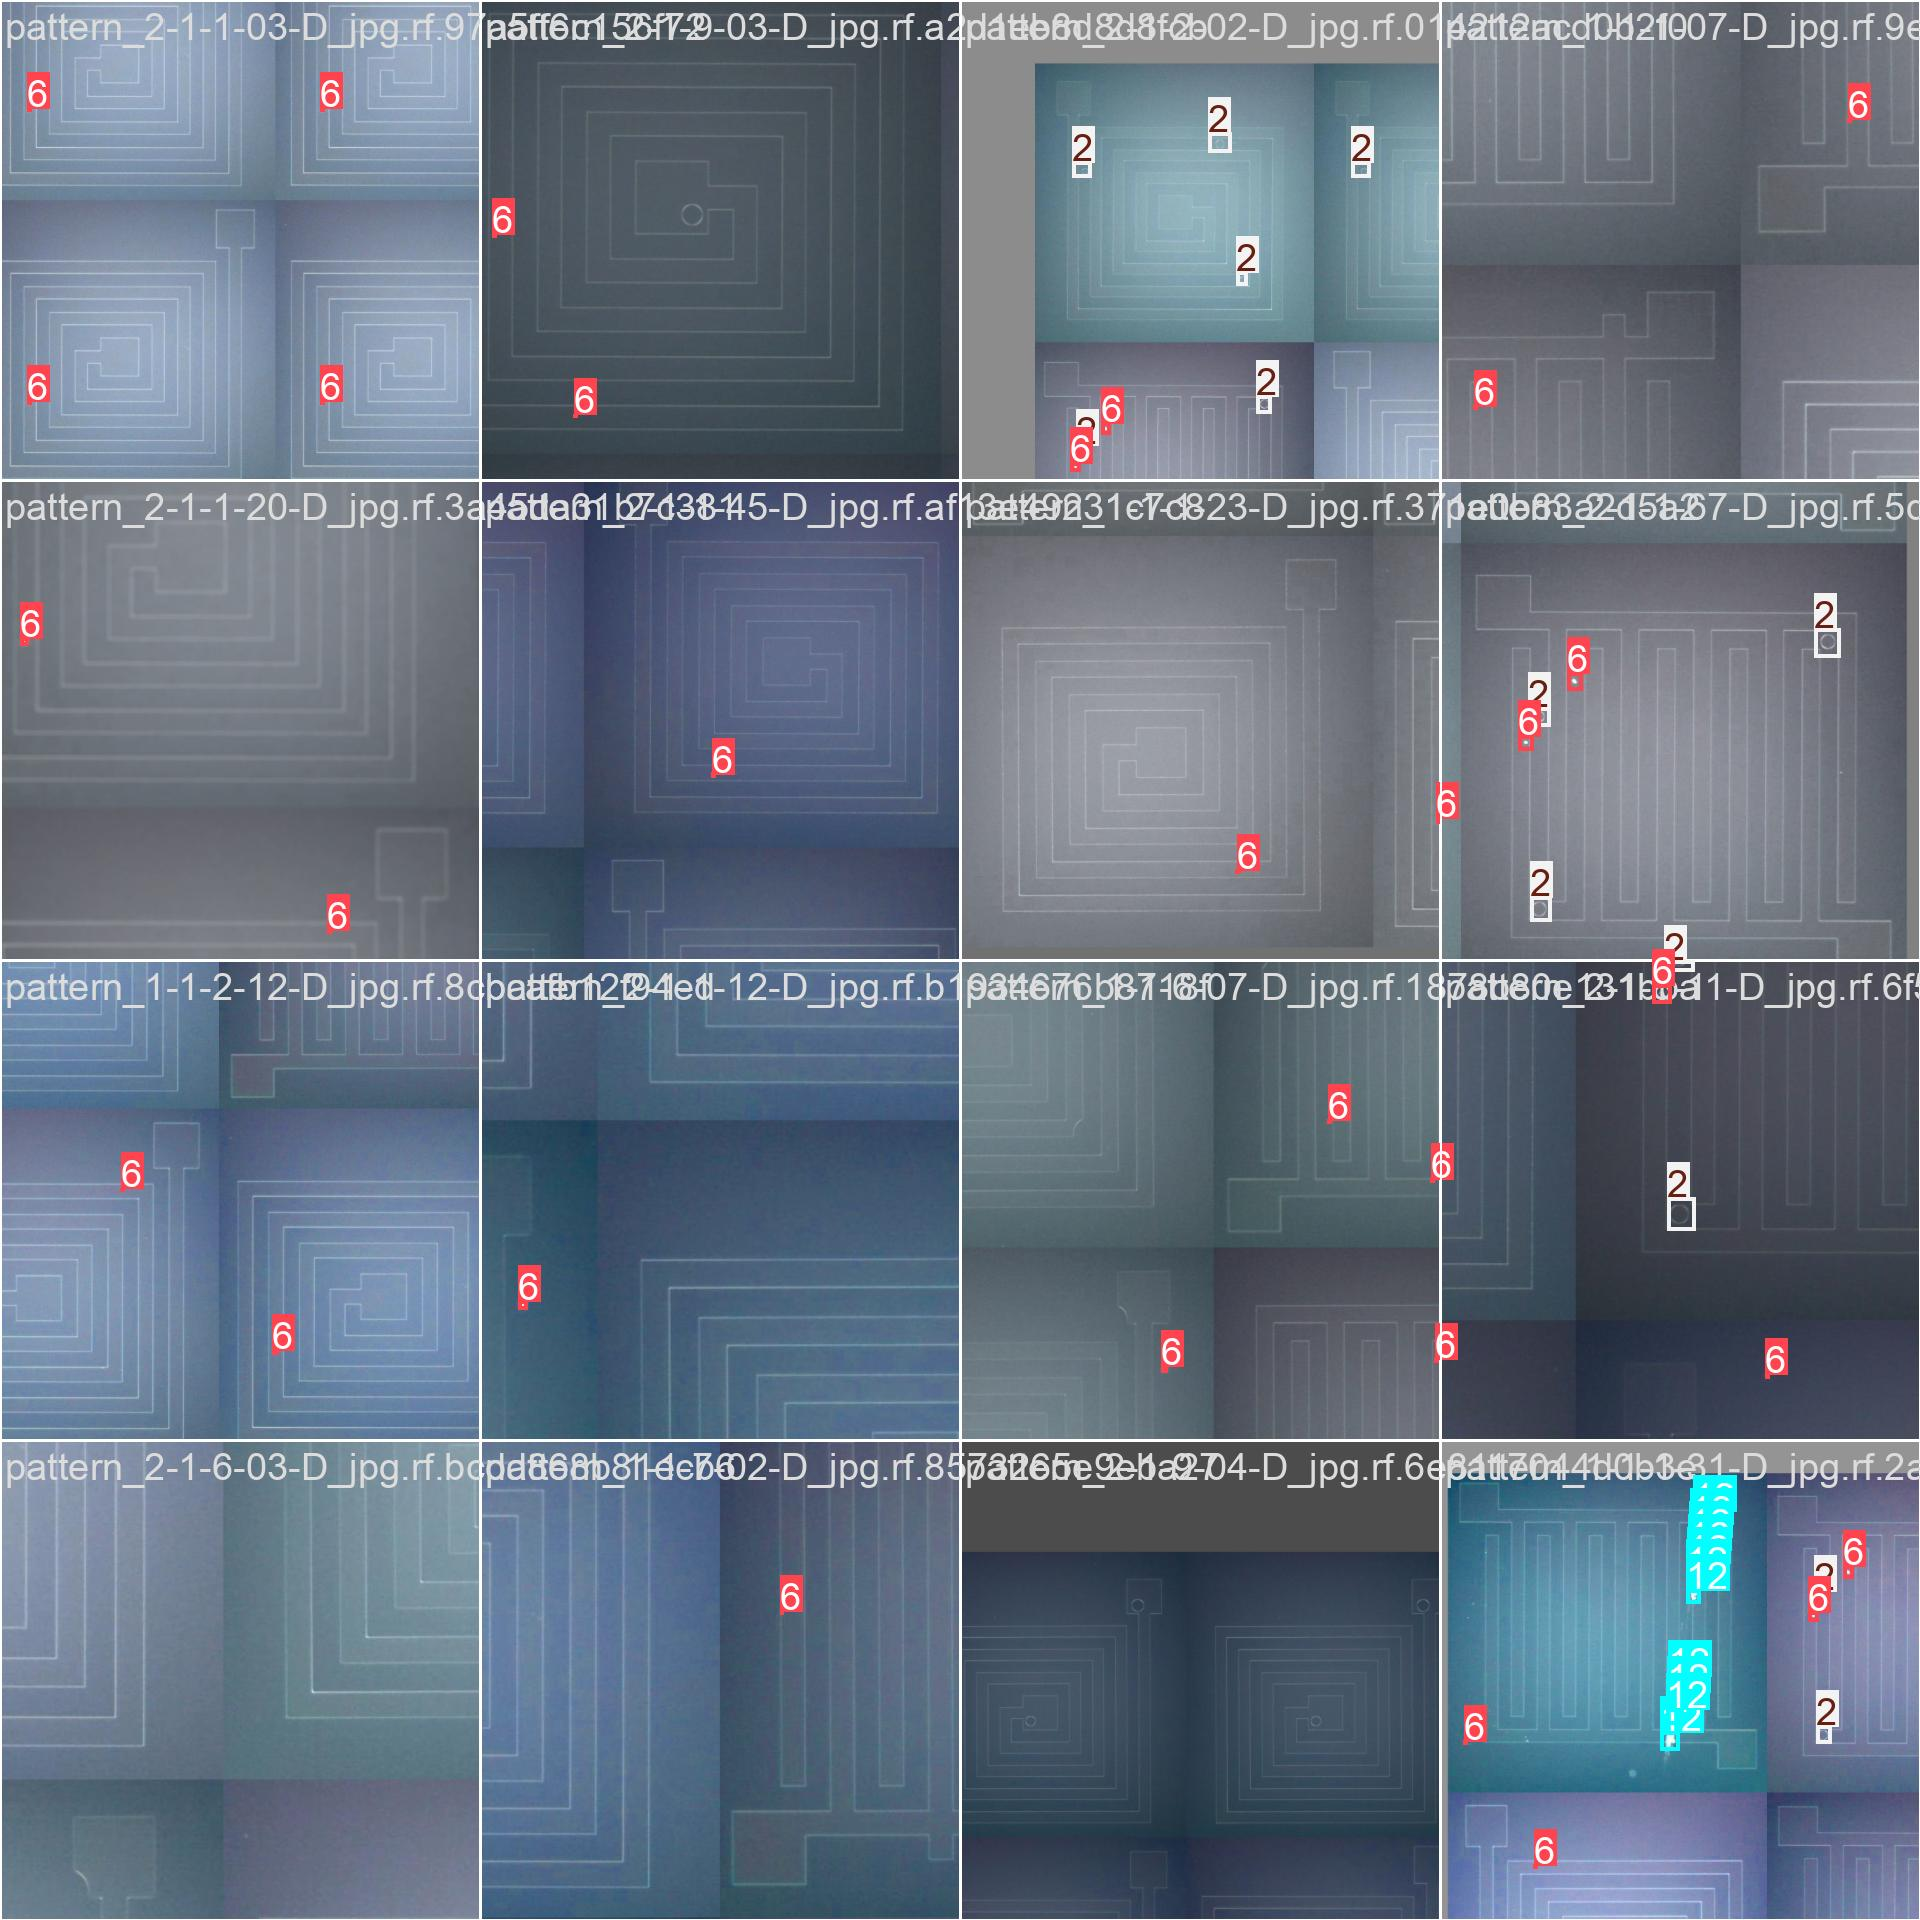

In [14]:
from PIL import Image
from IPython.display import Image, clear_output

Image(filename='/content/runs/detect/train/train_batch0.jpg', width=1000)

In [15]:
results = model.predict(soure='/content/sc_280_yolov8-2/valid/images/', save=True)

WARNING ⚠️ 'source' is missing. Using 'source=/usr/local/lib/python3.10/dist-packages/ultralytics/assets'.


SyntaxError: '[31m[1msoure[0m' is not a valid YOLO argument. Similar arguments are i.e. ['source'].

    Arguments received: ['yolo', '-f', '/root/.local/share/jupyter/runtime/kernel-831045df-4576-4260-9863-d6c6ad50ffb2.json']. Ultralytics 'yolo' commands use the following syntax:

        yolo TASK MODE ARGS

        Where   TASK (optional) is one of {'classify', 'obb', 'pose', 'segment', 'detect'}
                MODE (required) is one of {'val', 'train', 'benchmark', 'track', 'predict', 'export'}
                ARGS (optional) are any number of custom 'arg=value' pairs like 'imgsz=320' that override defaults.
                    See all ARGS at https://docs.ultralytics.com/usage/cfg or with 'yolo cfg'

    1. Train a detection model for 10 epochs with an initial learning_rate of 0.01
        yolo train data=coco8.yaml model=yolo11n.pt epochs=10 lr0=0.01

    2. Predict a YouTube video using a pretrained segmentation model at image size 320:
        yolo predict model=yolo11n-seg.pt source='https://youtu.be/LNwODJXcvt4' imgsz=320

    3. Val a pretrained detection model at batch-size 1 and image size 640:
        yolo val model=yolo11n.pt data=coco8.yaml batch=1 imgsz=640

    4. Export a YOLO11n classification model to ONNX format at image size 224 by 128 (no TASK required)
        yolo export model=yolo11n-cls.pt format=onnx imgsz=224,128

    5. Explore your datasets using semantic search and SQL with a simple GUI powered by Ultralytics Explorer API
        yolo explorer data=data.yaml model=yolo11n.pt
    
    6. Streamlit real-time webcam inference GUI
        yolo streamlit-predict
        
    7. Run special commands:
        yolo help
        yolo checks
        yolo version
        yolo settings
        yolo copy-cfg
        yolo cfg

    Docs: https://docs.ultralytics.com
    Community: https://community.ultralytics.com
    GitHub: https://github.com/ultralytics/ultralytics
     (<string>)

In [ ]:
print(type(results), len(results))

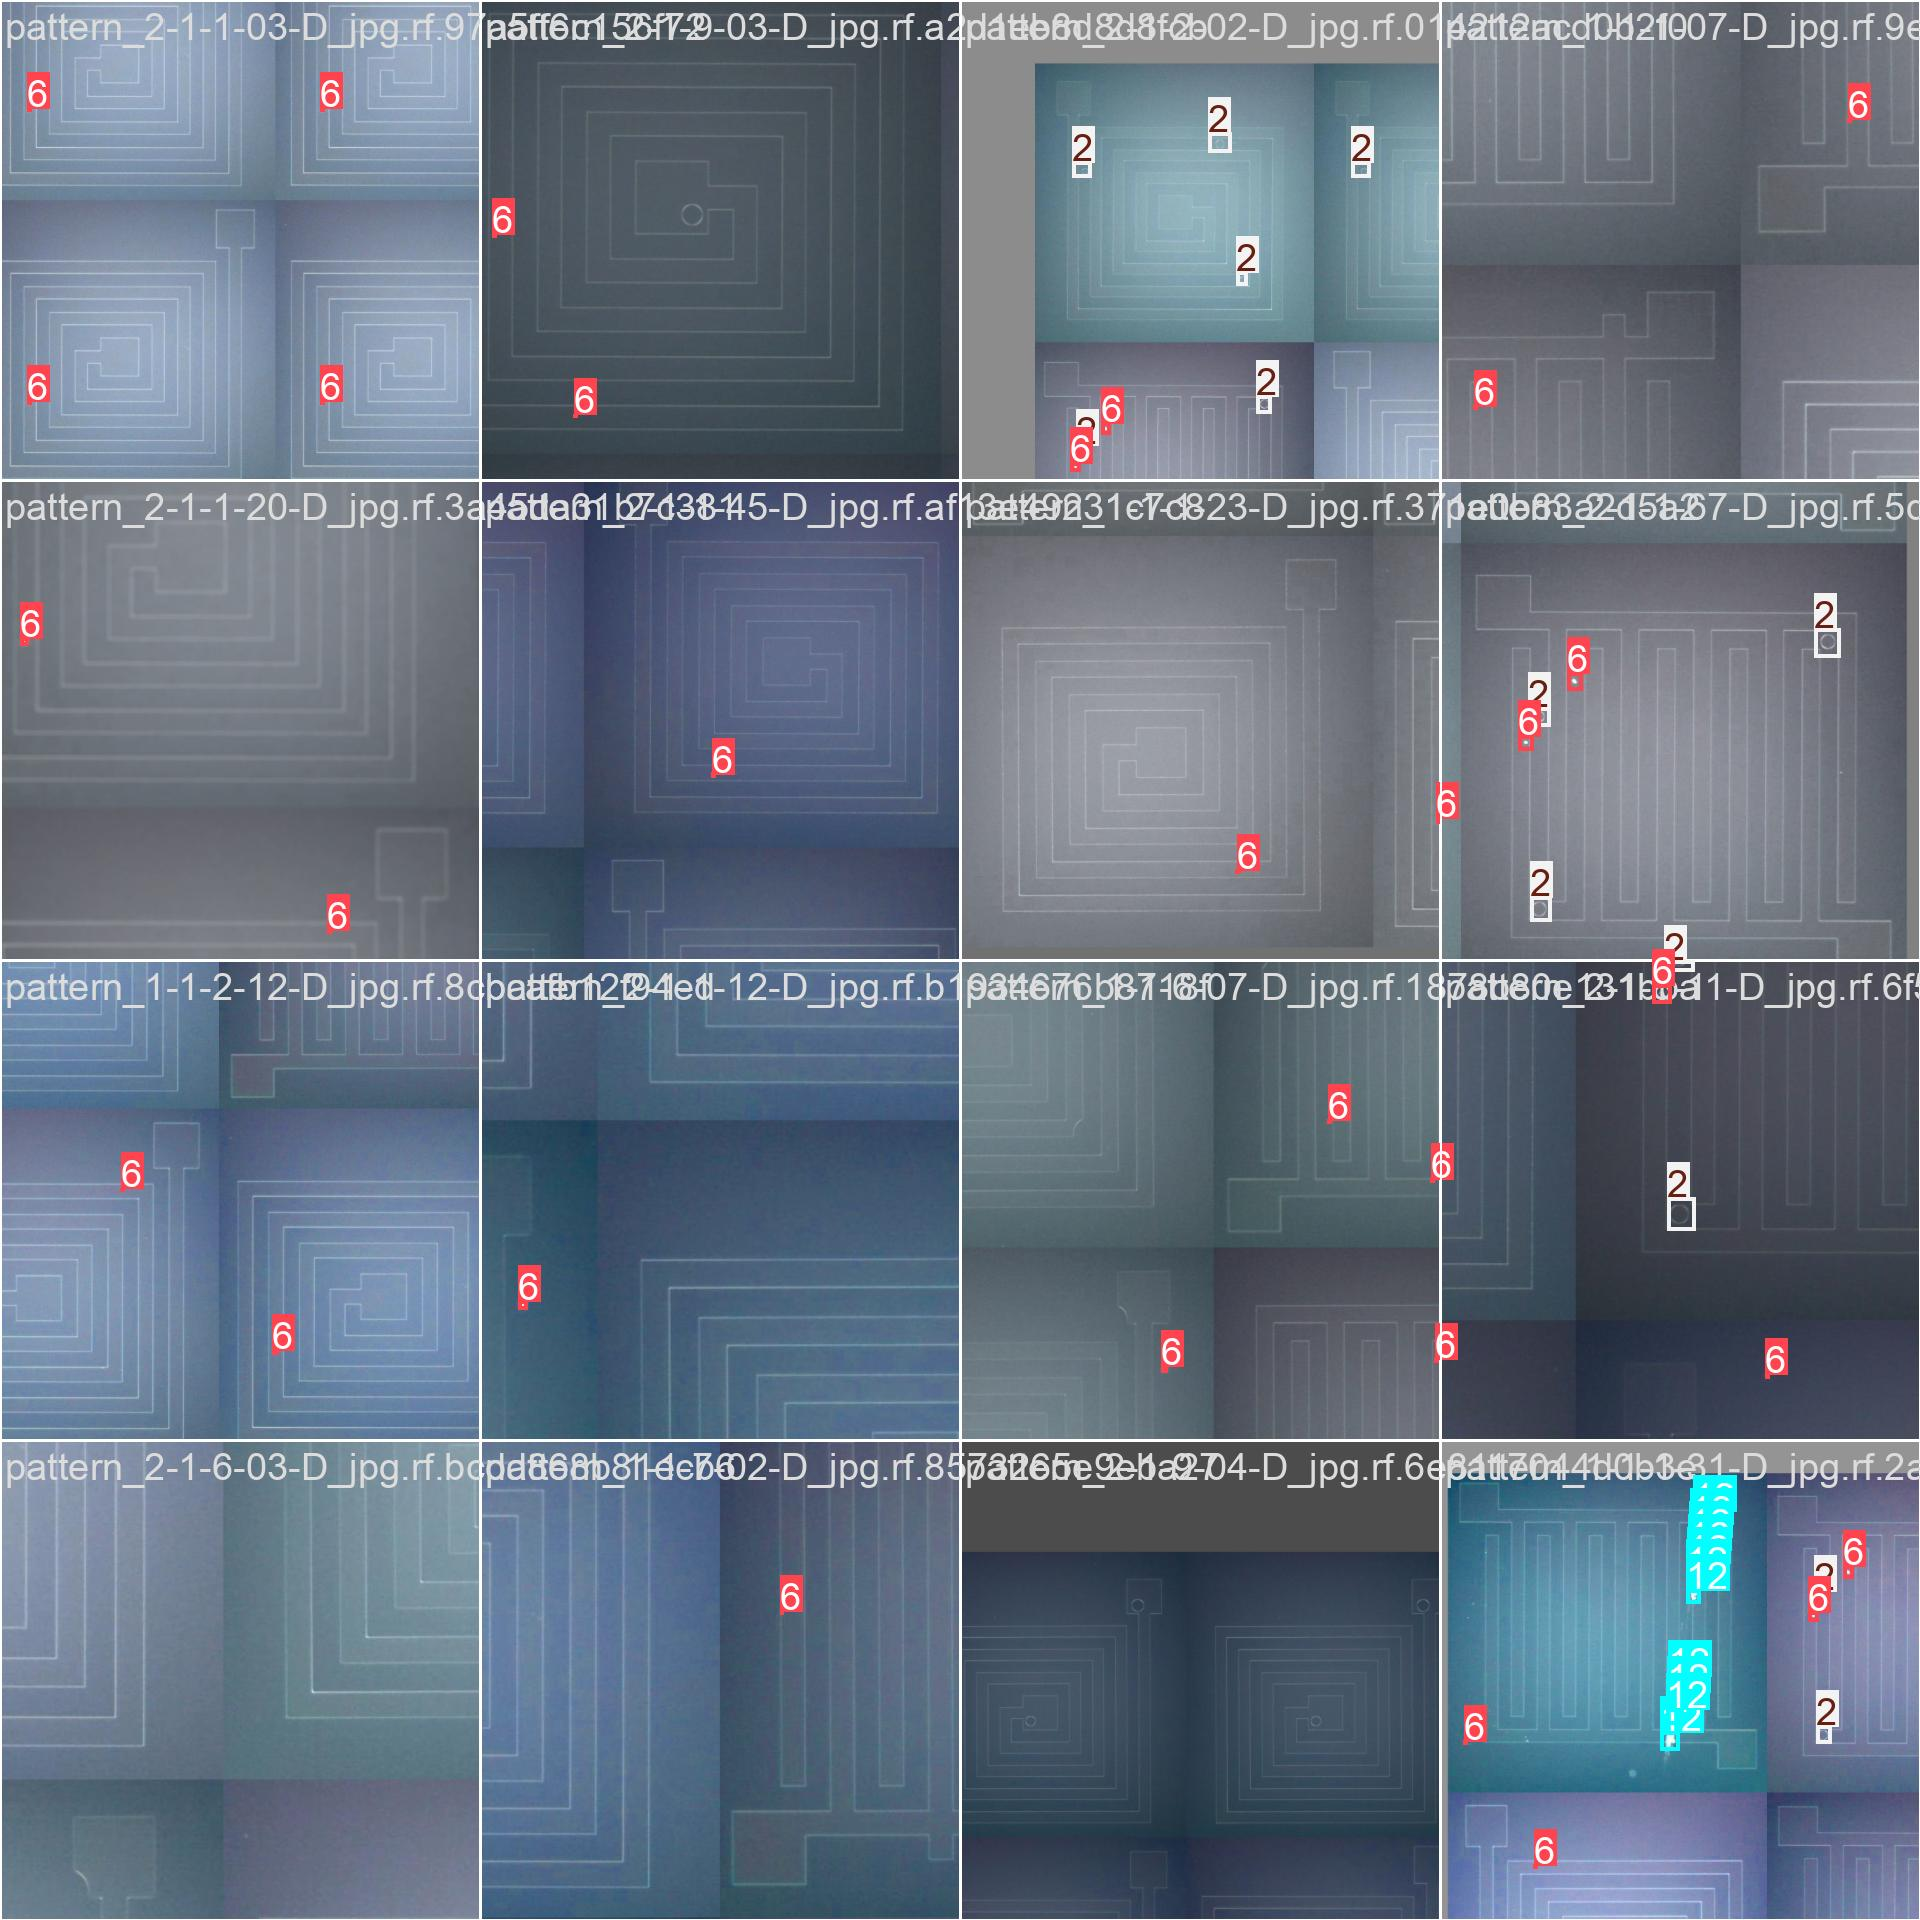

In [17]:
import glob
import random
from IPython.display import Image, display

image_name = random.choice(glob.glob('/content/runs/detect/train/*.jpg'))
display(Image(filename=image_name, width=1000, height=1000))